In [1]:
# load enrgenics-quantlet-import
source("enrgenics-quantlet-import.r")



Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [2]:
file = "data/sales_revenue_1.csv"
df = load_eia_data(file)

head(df)

,Year,Month,State,DataStatus,Cat,Revenue,Sales,Customers,Price,ID
1.RESIDENTIAL,1990,1,AK,Final,RESIDENTIAL,17477,181752,0,9.62,1
2.RESIDENTIAL,1990,1,AL,Final,RESIDENTIAL,123332,2070093,0,5.96,2
3.RESIDENTIAL,1990,1,AR,Final,RESIDENTIAL,72506,1026320,0,7.06,3
4.RESIDENTIAL,1990,1,AZ,Final,RESIDENTIAL,109332,1396499,0,7.83,4
5.RESIDENTIAL,1990,1,CA,Final,RESIDENTIAL,597161,6168009,0,9.68,5
6.RESIDENTIAL,1990,1,CO,Final,RESIDENTIAL,71325,1046805,0,6.81,6


In [33]:
totals = subset(df, DataStatus=="Final")
# tmp = dcast(totals[which(totals$Cat == "TOTAL"),], Year + Month ~ State + Cat, value.var="Sales", fun.aggregate = sum, na.rm = TRUE)
ts_year_by_state = dcast(totals[which(totals$Cat == "TOTAL"),], Year ~ State, value.var="Sales", fun.aggregate = sum)
corr_states = cor(ts_year_by_state[, c(-1,-ncol(ts_year_by_state))])
means_by_state = colMeans(ts_year_by_state[,-1])



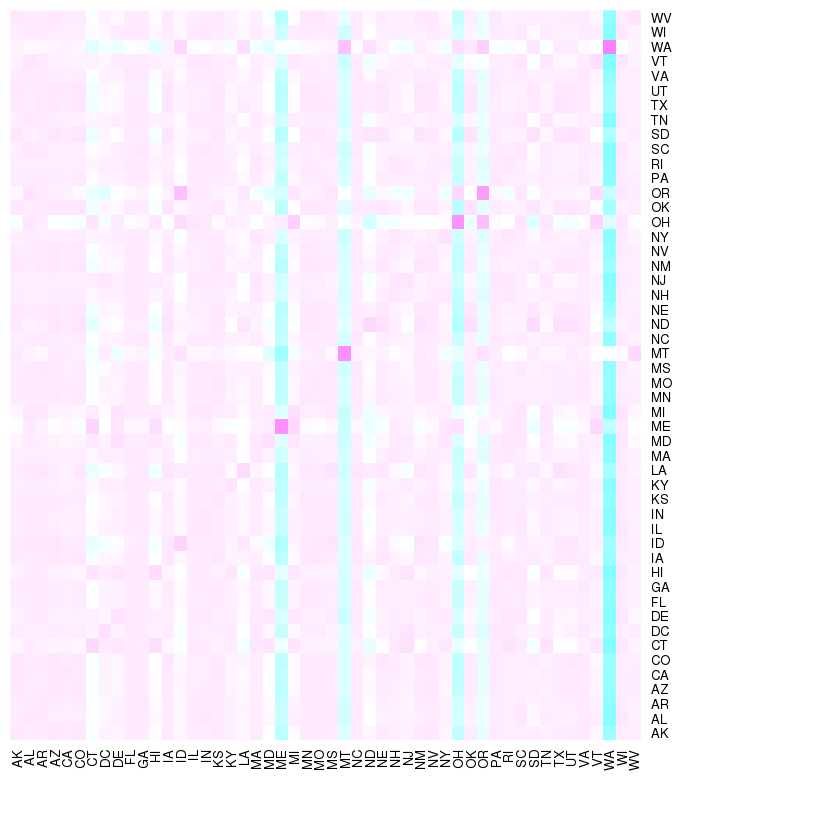

In [42]:
heatmap(corr_states, Rowv=NA, Colv=NA, col = cm.colors(256), margins=c(5,10))

[1] "/home/ubuntu/miniconda3/lib64/R/library"

character(0)

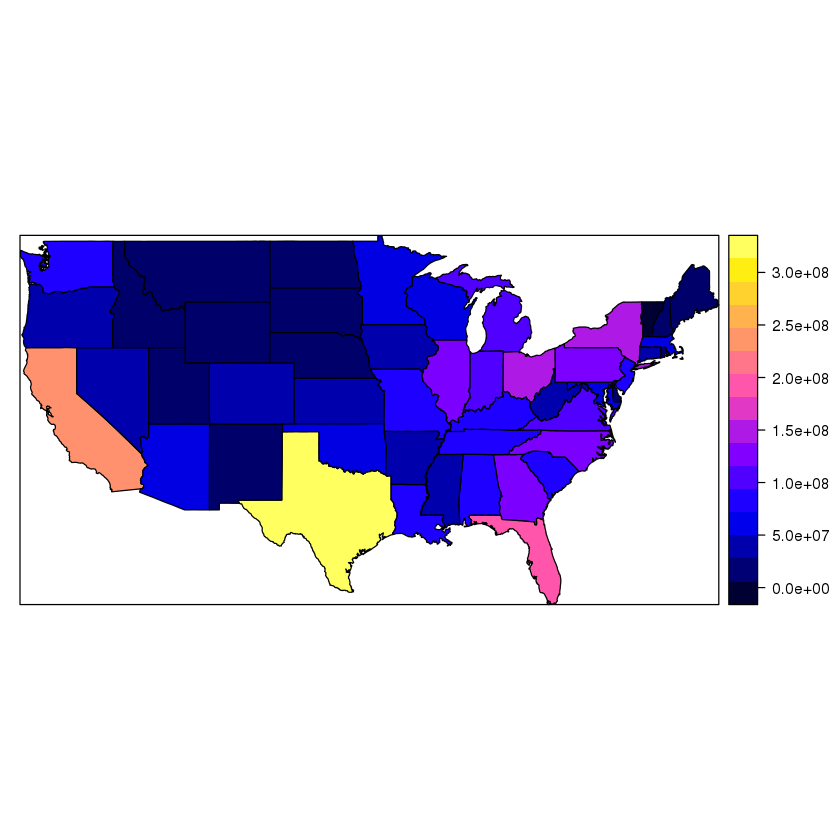

In [52]:
# consider weather data
# https://ram-n.github.io/weatherData/

# mapping without advanced libs
# http://stackoverflow.com/questions/24441775/how-do-you-create-a-us-states-heatmap-based-on-some-values

library(MASS)
library(maps)
library(maptools)
library(sp)

permit = gpclibPermit()
means_df = data.frame(means_by_state)
dat = means_df

dat$states <- tolower(state.name[match(rownames(dat),  state.abb)])
mapUSA <- map('state',  fill = TRUE,  plot = FALSE)
nms <- sapply(strsplit(mapUSA$names,  ':'),  function(x){x[1]})
USApolygons <- map2SpatialPolygons(mapUSA,  IDs = nms,  CRS('+proj=longlat'))

idx <- match(unique(nms),  dat$states)
dat2 <- data.frame(value = dat$means_by_state[idx], state = unique(nms))
row.names(dat2) <- unique(nms)
USAsp <- SpatialPolygonsDataFrame(USApolygons,  data = dat2)
    
spplot(USAsp['value'])
# https://www.census.gov/popest/data/datasets.html
# https://docs.google.com/spreadsheets/d/1JsV5bNnFoE-4xapsnrpqRP-5wgTkpDjgC0SXKW8zgPI/edit#gid=0